In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

import wrangle

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
df = wrangle.wrangle_zillow()


# Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

Text(0.5, 1.0, 'Scaled')

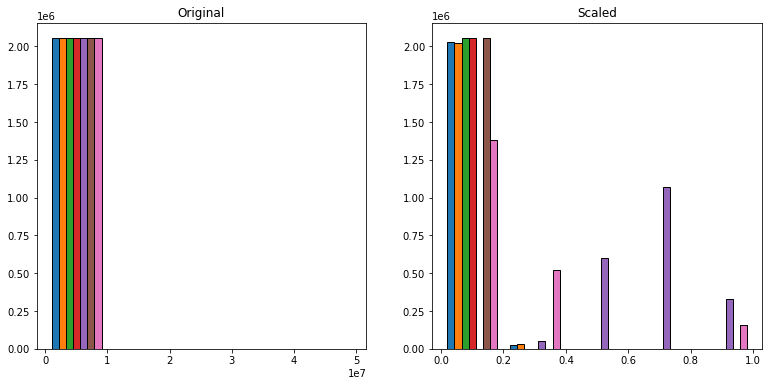

In [3]:
# MinMax Scale min 0 max 1
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(df)

df_scaled = scaler.transform(df)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_scaled, bins=5, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

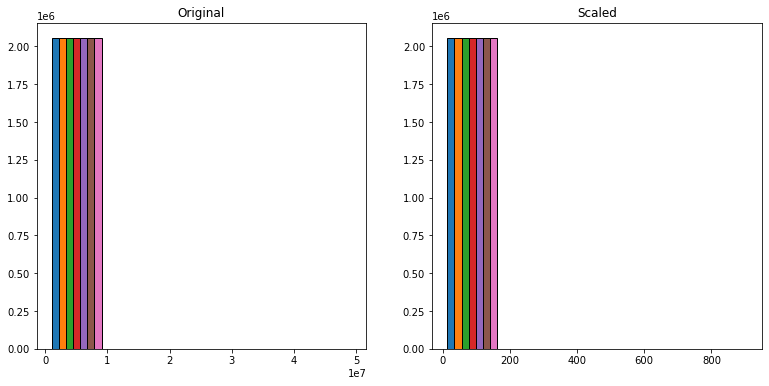

In [4]:
# Standard Scaler - mean 0, std 1
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(df)

df_scaled = scaler.transform(df)


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_scaled, bins=5, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

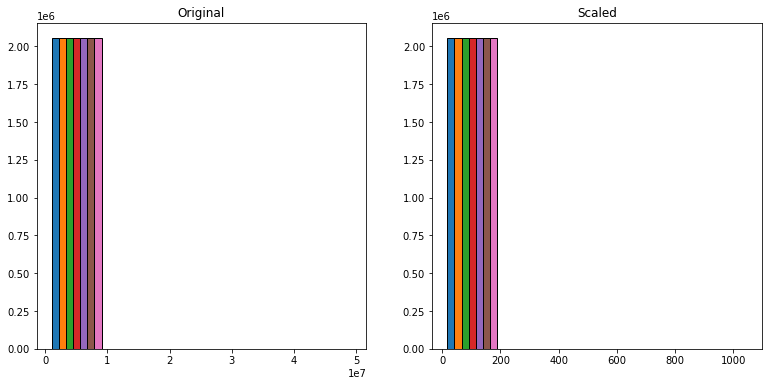

In [5]:
# Robust Scaler - uses parameters that are more robust to outliers.
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(df)

df_scaled = scaler.transform(df)


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(df, bins=5, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(df_scaled, bins=5, ec='black')
plt.title('Scaled')

# Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [6]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


In [7]:
df = scaler.transform(df)

In [8]:
pd.DataFrame(scaler.inverse_transform(df)).head()

,0,1,2,3,4,5,6
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
2,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
3,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
4,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


### Yes, inverse_transform returns the original df (minus the headers)

In [9]:
df = wrangle.wrangle_zillow()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0


# Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [11]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')

In [12]:
pd.DataFrame(scaler.fit_transform(df))

,0,1,2,3,4,5,6
0,0.734798,-0.135911,1.932862,-0.100233,2.063775,0.864504,-5.199338
1,-0.275694,-0.135911,0.611996,1.020593,-1.425011,1.068053,-5.199338
2,-0.275694,-5.199338,-0.676854,-0.755954,-0.589456,-0.658422,-5.199338
3,-0.275694,-0.135911,-0.551076,-0.404979,-0.589456,-0.380924,-5.199338
4,-0.275694,-0.135911,-0.733156,-0.125533,-0.500651,-0.055183,-5.199338
...,...,...,...,...,...,...,...
2054411,-0.275694,0.549616,0.307111,0.330791,2.575483,0.059739,0.833781
2054412,0.734798,1.865852,2.349309,0.390602,3.089935,1.794851,-5.199338
2054413,0.734798,1.002056,0.795322,1.577895,3.089935,1.765595,0.833781
2054414,-0.275694,0.549616,0.504447,0.397071,3.089935,0.434491,0.833781


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

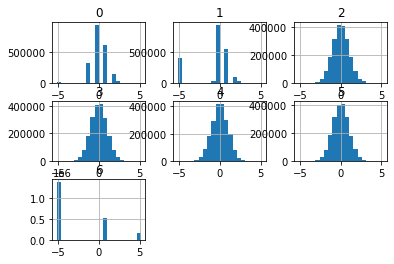

In [13]:
pd.DataFrame(scaler.fit_transform(df)).hist(bins=20)

# Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

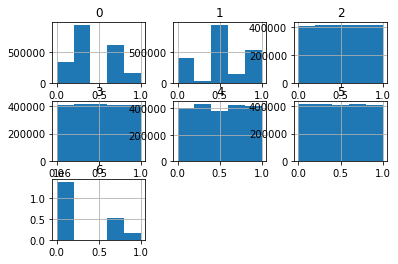

In [14]:
scaler = sklearn.preprocessing.QuantileTransformer()
pd.DataFrame(scaler.fit_transform(df)).hist(bins=5)

### The histograms are no longer evenly distributed

In [15]:
df = wrangle.wrangle_zillow()

/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [16]:
scaler = sklearn.preprocessing.QuantileTransformer()
df[df.columns] = scaler.fit_transform(df[df.columns])